In [1]:
# Instalação e Importação das Bibliotecas

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para melhorar a aparência dos gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Coleta dos Dados da API
# Conexão com Fake Store API para buscar a lista completa de produtos.

API_URL = "https://fakestoreapi.com/products"

try:
    response = requests.get(API_URL)
    response.raise_for_status()
    data = response.json()
    print("Dados coletados com sucesso!")

    print("\nProduto recebido da API:")
    print(data[0])

except requests.exceptions.RequestException as e:
    print(f"Erro ao se conectar com a API: {e}")
    data = None

Dados coletados com sucesso!

Produto recebido da API:
{'id': 1, 'title': 'Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops', 'price': 109.95, 'description': 'Your perfect pack for everyday use and walks in the forest. Stash your laptop (up to 15 inches) in the padded sleeve, your everyday', 'category': "men's clothing", 'image': 'https://fakestoreapi.com/img/81fPKd-2AYL._AC_SL1500_.jpg', 'rating': {'rate': 3.9, 'count': 120}}


In [3]:
# Transformação, Limpeza e Estruturação dos Dados (ETL)
# Estruturando em um DataFrame do Pandas.
# Também vamos tratar campos aninhados (como a avaliação 'rating').

if data:
    df = pd.DataFrame(data)

    df['avaliacao_media'] = df['rating'].apply(lambda r: r['rate'])
    df['avaliacoes_contagem'] = df['rating'].apply(lambda r: r['count'])

    df.drop('rating', axis=1, inplace=True)

    # Renomeando colunas para português
    df.rename(columns={
        'id': 'id_produto',
        'title': 'nome_produto',
        'price': 'preco',
        'description': 'descricao',
        'category': 'categoria',
        'image': 'url_imagem'
    }, inplace=True)

    print("DataFrame criado e limpo!")
    df.info()

    print("\nDataFrame estruturado:")
    display(df.head())
else:
    print("A análise não pode continuar pois a coleta de dados falhou.")

DataFrame criado e limpo!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_produto           20 non-null     int64  
 1   nome_produto         20 non-null     object 
 2   preco                20 non-null     float64
 3   descricao            20 non-null     object 
 4   categoria            20 non-null     object 
 5   url_imagem           20 non-null     object 
 6   avaliacao_media      20 non-null     float64
 7   avaliacoes_contagem  20 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 1.4+ KB

DataFrame estruturado:


,id_produto,nome_produto,preco,descricao,categoria,url_imagem,avaliacao_media,avaliacoes_contagem
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,men's clothing,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,3.9,120
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,4.1,259
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,4.7,500
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,men's clothing,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,2.1,430
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",jewelery,https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,4.6,400



--- 4.1 Análise de Categorias ---


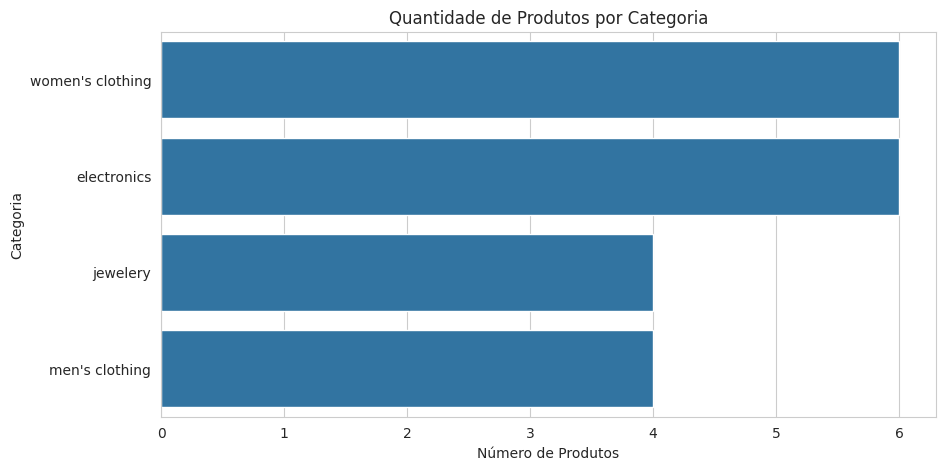


--- 4.2 Análise de Preços ---


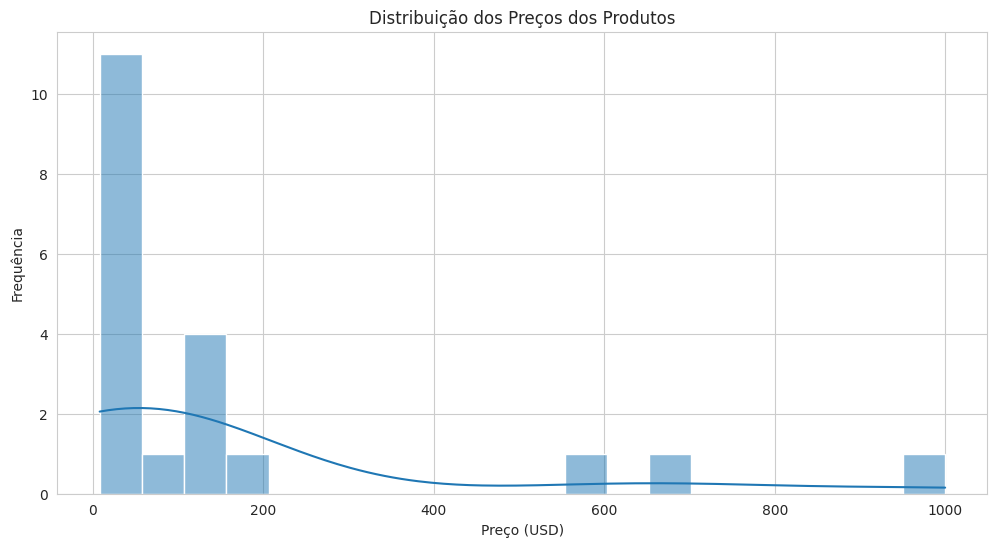

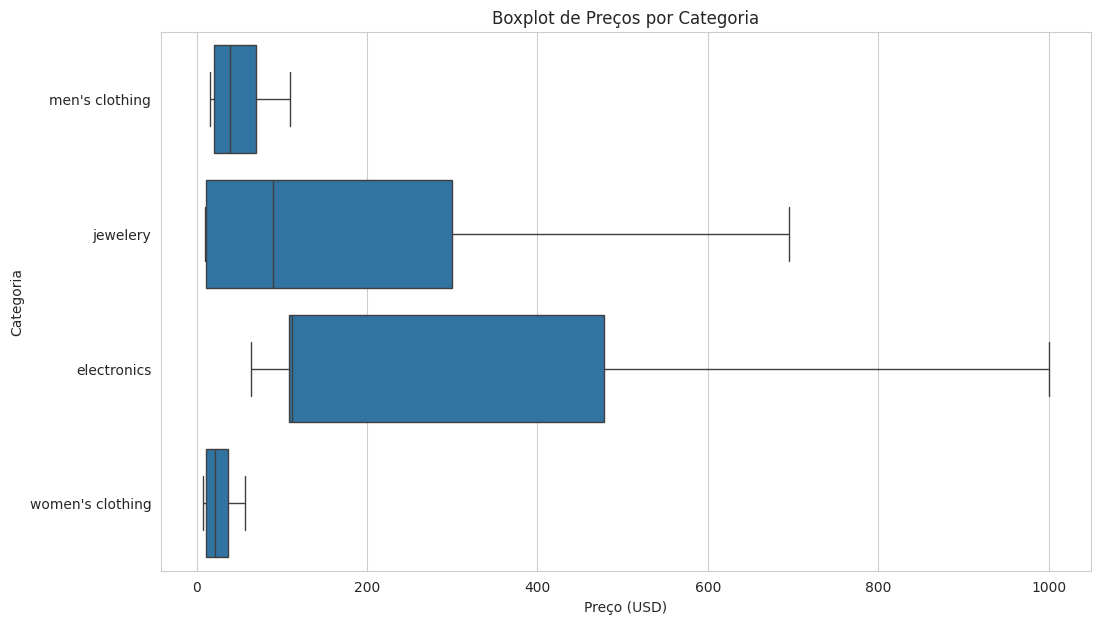


--- 4.3 Análise de Avaliações vs. Preço ---


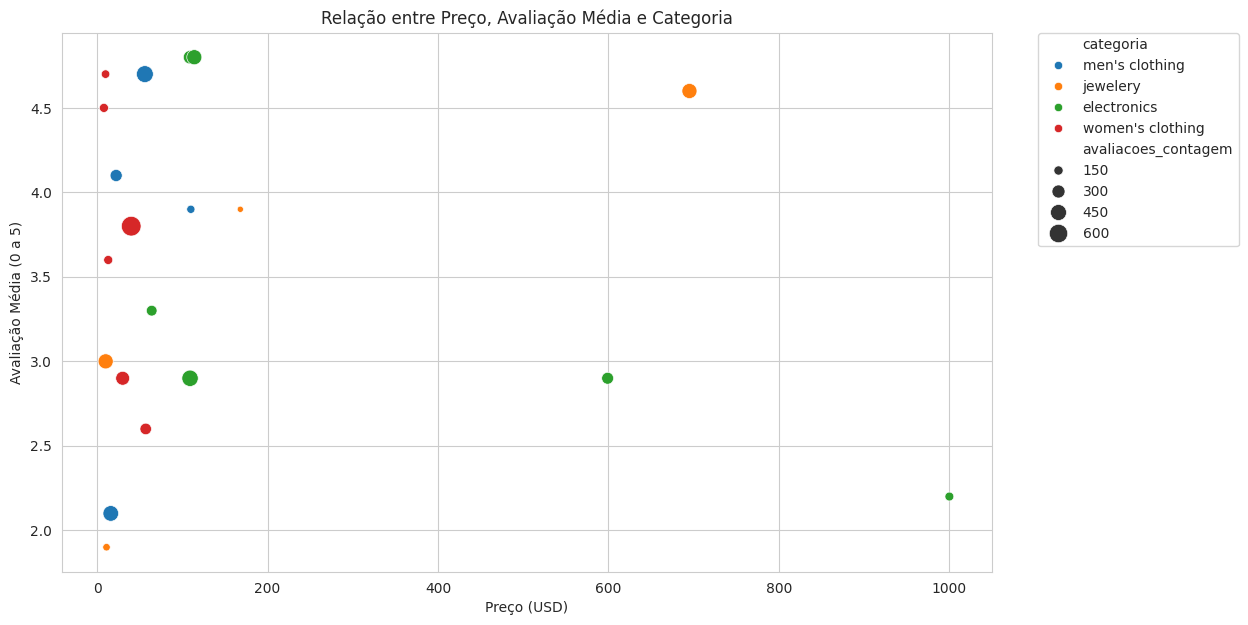

In [4]:
# Análise Exploratória de Dados (EDA)

if 'df' in locals():
    # Como os produtos se distribuem por categoria?
    print("\n--- 4.1 Análise de Categorias ---")
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df['categoria'], order=df['categoria'].value_counts().index)
    plt.title('Quantidade de Produtos por Categoria')
    plt.xlabel('Número de Produtos')
    plt.ylabel('Categoria')
    plt.show()

    # Como os preços estão distribuídos?
    print("\n--- 4.2 Análise de Preços ---")
    plt.figure(figsize=(12, 6))
    sns.histplot(df['preco'], kde=True, bins=20)
    plt.title('Distribuição dos Preços dos Produtos')
    plt.xlabel('Preço (USD)')
    plt.ylabel('Frequência')
    plt.show()

    # Como os preços se comparam entre as categorias?
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='preco', y='categoria', data=df)
    plt.title('Boxplot de Preços por Categoria')
    plt.xlabel('Preço (USD)')
    plt.ylabel('Categoria')
    plt.show()

    #Existe relação entre preço e avaliação?
    print("\n--- 4.3 Análise de Avaliações vs. Preço ---")
    plt.figure(figsize=(12, 7))
    sns.scatterplot(x='preco', y='avaliacao_media', hue='categoria', size='avaliacoes_contagem', data=df, sizes=(20, 200))
    plt.title('Relação entre Preço, Avaliação Média e Categoria')
    plt.xlabel('Preço (USD)')
    plt.ylabel('Avaliação Média (0 a 5)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [8]:
# Respondendo Perguntas de Negócio

if 'df' in locals():
    print("--- Resumo Analítico por Categoria ---")

    resumo_categoria = df.groupby('categoria').agg(
        numero_de_produtos=('id_produto', 'count'),
        preco_medio=('preco', 'mean'),
        avaliacao_media=('avaliacao_media', 'mean'),
        total_avaliacoes=('avaliacoes_contagem', 'sum')
    ).round(2).sort_values(by='preco_medio', ascending=False)

    display(resumo_categoria)

    print("\n--- Principais Insights ---")
    print("1. Composição do Catálogo: As categorias de vestuário ('men\'s clothing', 'women\'s clothing') dominam em quantidade de itens, mas não em preço.")
    print("2. Preços: A categoria 'electronics' possui o preço médio significativamente mais alto e a maior variação de preços, indicando a presença de itens premium.")
    print("3. Avaliações: Não há uma correlação clara de que 'mais caro' significa 'melhor avaliado'. Produtos de todas as faixas de preço recebem boas avaliações.")
    print(f"4. Destaque: A categoria com a melhor avaliação média geral é a de 'electronics' ({resumo_categoria.loc['electronics']['avaliacao_media']}), apesar de não ser a com mais produtos.")

--- Resumo Analítico por Categoria ---


,numero_de_produtos,preco_medio,avaliacao_media,total_avaliacoes
categoria,,,,
electronics,6,332.50,3.48,1782
jewelery,4,221.00,3.35,970
men's clothing,4,51.06,3.70,1309
women's clothing,6,26.29,3.68,1675



--- Principais Insights ---
1. Composição do Catálogo: As categorias de vestuário ('men's clothing', 'women's clothing') dominam em quantidade de itens, mas não em preço.
2. Preços: A categoria 'electronics' possui o preço médio significativamente mais alto e a maior variação de preços, indicando a presença de itens premium.
3. Avaliações: Não há uma correlação clara de que 'mais caro' significa 'melhor avaliado'. Produtos de todas as faixas de preço recebem boas avaliações.
4. Destaque: A categoria com a melhor avaliação média geral é a de 'electronics' (3.48), apesar de não ser a com mais produtos.


In [9]:
# Salvando os Resultados
# Salvando dataframe limpo em um arquivo CSV

if 'df' in locals():
    output_filename = 'catalogo_produtos_analisado.csv'
    try:
        df.to_csv(output_filename, index=False, sep=';', decimal=',')
        print(f"\nSUCESSO! Dados salvos:'{output_filename}'!")
    except Exception as e:
        print(f"Erro ao salvar o arquivo: {e}")


SUCESSO! Dados salvos:'catalogo_produtos_analisado.csv'!
